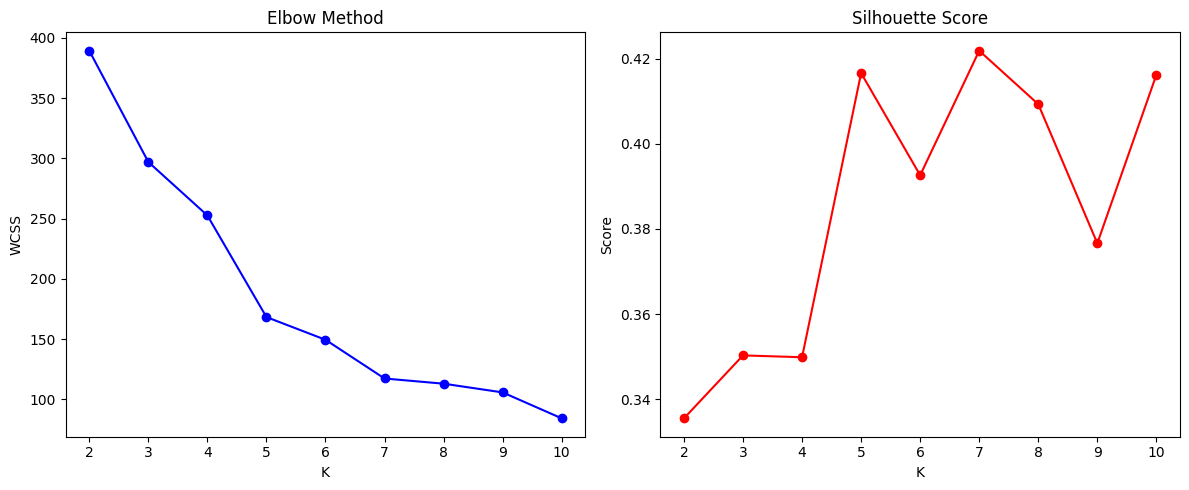

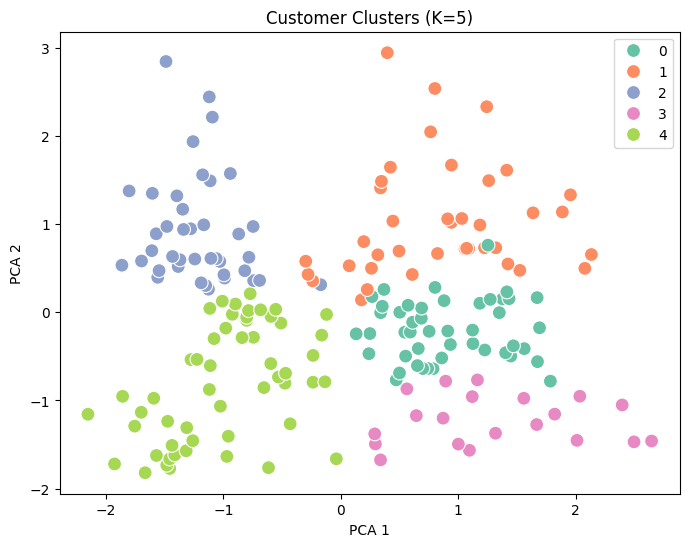

Silhouette Score for K=5: 0.417


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')  # Make sure the file is in the same folder
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(X)

wcss, sil_scores = [], []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'ro-')
plt.title('Silhouette Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

k = 5
model = KMeans(n_clusters=k, random_state=0)
labels = model.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set2', s=100)
plt.title(f'Customer Clusters (K={k})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for K={k}: {score:.3f}")
